In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
happy = pd.read_csv("../Data/HappyHotel/hotel_happy_reviews.csv")
unhappy= pd.read_csv("../Data/HappyHotel/hotel_not_happy_reviews.csv")

In [3]:
happy

,User_ID,Description,Is_Response,hotel_ID
0,id10329,Stayed here with husband and sons on the way t...,happy,8
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3
...,...,...,...,...
26516,id49247,We staed at the Handlery Hotel to Visit San Di...,happy,5
26517,id49250,We booked a room with two single beds. Upon ar...,happy,3
26518,id49251,Arrived via taxi from La Guardia - driving int...,happy,8
26519,id49253,We arrived late at night and walked in to a ch...,happy,8


In [4]:
unhappy

,User_ID,Description,Is_Response,hotel_ID
0,id10326,The room was kind of clean but had a VERY stro...,not happy,3
1,id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9
2,id10328,I booked this hotel through Hotwire at the low...,not happy,3
3,id10330,My girlfriends and I stayed here to celebrate ...,not happy,3
4,id10332,My husband and I have stayed in this hotel a f...,not happy,7
...,...,...,...,...
12406,id49249,I am pretty impartial to this hotel. I would d...,not happy,2
12407,id49252,I tend to post reviews only when I’ve had an e...,not happy,1
12408,id49254,The only positive impression is location and p...,not happy,2
12409,id49255,Traveling with friends for shopping and a show...,not happy,5


In [5]:
hotel_data = pd.concat([happy, unhappy], axis=0)

In [6]:
hotel_data = hotel_data.reset_index(drop=True)

In [7]:
hotel_data

,User_ID,Description,Is_Response,hotel_ID
0,id10329,Stayed here with husband and sons on the way t...,happy,8
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3
...,...,...,...,...
38927,id49249,I am pretty impartial to this hotel. I would d...,not happy,2
38928,id49252,I tend to post reviews only when I’ve had an e...,not happy,1
38929,id49254,The only positive impression is location and p...,not happy,2
38930,id49255,Traveling with friends for shopping and a show...,not happy,5


In [8]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_ID      38932 non-null  object
 1   Description  38932 non-null  object
 2   Is_Response  38932 non-null  object
 3   hotel_ID     38932 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [9]:
hotel_data.isnull().sum()

User_ID        0
Description    0
Is_Response    0
hotel_ID       0
dtype: int64

In [10]:
hotel_data['Description'][1]

"We had - rooms. One was very nice and clearly had been updated more recently than the other. The other was clean and the bed was comfy but it needed some updating (carpet was old and wrinkled for example). Great location for visiting Inner Harbor, getting to Fells Point, Orioles games etc. SuperShuttle from BWI worked great both ways. TV remotes in both rooms were terrible but we didn't watch much TV so not a big deal. Wireless was sketchy on --th and --th floors but again, didn't need it much - we were on vacation so it didn't really matter. Breakfast was good each morning. Would stay again if in town."

In [11]:
hotel_data['Description'][38927]

'I am pretty impartial to this hotel. I would definitely never tell anyone not to stay here, but I wouldn\'t strongly encourage them either. I think the actual hotel is very beautiful and modern. The view in my room was of Coronado Island, which was wonderful. \r\nPros-\r\nNew, clean, modern, pretty, big rooms\r\nMy issues were more with how much they charge for everything. I was here for business so I did not have to pay for the stay, so me saying that they nickle and dime you should mean even more. First of all, they charged me $-- additional dollars each night for a room with a view. Let me tell you that the first room """"""""""""""""""""""""""""""""without a view"""""""""""""""""""""""""""""""" could not be more true. It was on the -th floor and literally overlooked a concrete stairwell, part of the roof, and the shipyard. It was so depressing. Once I requested the exact same room, but with a view, I could see Coronado Island, which was great. The room price alone ended up being $

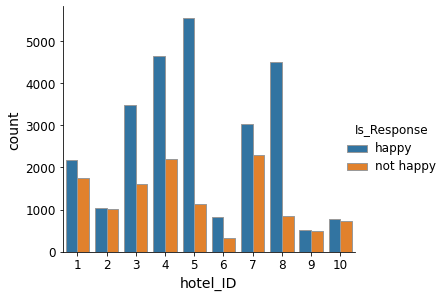

In [12]:
ax = sns.catplot("hotel_ID", hue="Is_Response", kind="count", edgecolor=".6", data=hotel_data)
plt.gcf().set_size_inches(6, 4)
plt.setp(ax._legend.get_texts(), fontsize='12')
plt.setp(ax._legend.get_title(), fontsize='12')
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel("hotel_ID", fontsize=14)
plt.ylabel("count", fontsize=14)
plt.savefig("../Data/HappyHotel/Hotel_review_dist.png", dpi=100);

### Data Preprocessing

I will perform the following:
1. **Tokenization**: Split the  text i nto sentences and sentences into words. Lowercase the words and remove punctuations
2. **Words with fewers than 3 characters** will be removed
3. **stopwords** will be removed
4. **Lemmatized words**
5. **Words are stemmed**: words will be reduced to their root forms

#### Loading gensim and NLTK libraries

In [42]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS 
from gensim.models import CoherenceModel
from gensim.models import HdpModel
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

import wordcloud
from gensim import models

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
# NLTK Stop words
#from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sergeouedraogo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeouedraogo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### A function to lemmatize and stemming

In [14]:
stemmer = SnowballStemmer('english')

In [51]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
            result.append(lemmatize_stemming(token))
    return result

def remove_stop_word(text):
    my_stopwords=set(stopwords.words('english'))
    new_tokens=[]
    # Tokenization using word_tokenize()
    all_tokens=nltk.word_tokenize(text)
    for token in all_tokens:
        if token not in my_stopwords:
            new_tokens.append(token)
    return new_tokens

            

#### Select a sample to preview after preprocessing

In [16]:
doc_sample = hotel_data['Description'][0]

In [17]:
print('Original document:')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

Original document:
['Stayed', 'here', 'with', 'husband', 'and', 'sons', 'on', 'the', 'way', 'to', 'an', 'Alaska', 'Cruise.', 'We', 'all', 'loved', 'the', 'hotel,', 'great', 'experience.', 'Ask', 'for', 'a', 'room', 'on', 'the', 'North', 'tower,', 'facing', 'north', 'west', 'for', 'the', 'best', 'views.', 'We', 'had', 'a', 'high', 'floor,', 'with', 'a', 'stunning', 'view', 'of', 'the', 'needle,', 'the', 'city,', 'and', 'even', 'the', 'cruise', 'ships!', 'We', 'ordered', 'room', 'service', 'for', 'dinner', 'so', 'we', 'could', 'enjoy', 'the', 'perfect', 'views.', 'Room', 'service', 'dinners', 'were', 'delicious,', 'too!', 'You', 'are', 'in', 'a', 'perfect', 'spot', 'to', 'walk', 'everywhere,', 'so', 'enjoy', 'the', 'city.', 'Almost', 'forgot-', 'Heavenly', 'beds', 'were', 'heavenly,', 'too!']


In [54]:
print('Tokenized document:')
print(preprocess(doc_sample))

Tokenized document:
['stay', 'husband', 'son', 'alaska', 'cruis', 'love', 'hotel', 'great', 'experi', 'room', 'north', 'tower', 'face', 'north', 'west', 'best', 'view', 'high', 'floor', 'stun', 'view', 'needl', 'citi', 'cruis', 'ship', 'order', 'room', 'servic', 'dinner', 'enjoy', 'perfect', 'view', 'room', 'servic', 'dinner', 'delici', 'perfect', 'spot', 'walk', 'enjoy', 'citi', 'forget', 'heaven', 'bed', 'heaven']


#### Preprocess the documents in Description and save the results as processed_doc

In [19]:
processed_doc = hotel_data['Description'].map(preprocess)

In [20]:
processed_doc[:5]

0    [stay, husband, son, alaska, cruis, love, hote...
1    [room, nice, clear, updat, recent, clean, comf...
2    [wife, stay, glorious, citi, expens, littl, ho...
3    [boyfriend, stay, fairmont, recent, trip, fran...
4    [step, time, squar, nice, room, stay, night, g...
Name: Description, dtype: object

### Bag of Words on the Dataset

Create a dictionary from processed_docs containing the number of times a word appears in the training set

In [21]:
dictionary = gensim.corpora.Dictionary(processed_doc)

count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count+=1
    if count > 10:
        break

0 alaska
1 bed
2 best
3 citi
4 cruis
5 delici
6 dinner
7 enjoy
8 experi
9 face
10 floor


I will filter out token that appear in:
1. ***less than 15 documents***
2. ***more than half of the documents***
3. ***after oth steps keep only the first 100000 most frequent tokens***

In [22]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [23]:
dictionary[100]

'see'

#### Gensim doc2bow

for each document I will create a dictionary reporting how many words and how many times those words appear.This dictionary will be saved into bow_corpus

In [24]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_doc]

In [25]:
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 2),
 (7, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 2),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 1),
 (20, 2),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 3),
 (28, 1),
 (29, 1)]

#### Preview Bag of Words for preprocessed document hotel_data['Description'][0]

In [26]:
bow_doc_0 = bow_corpus[0]
for i in range(len(bow_doc_0)):
    print("Word {} (\"{}\") appears {} time."\
          .format(bow_doc_0[i][0], dictionary[bow_doc_0[i][0]],bow_doc_0[i][1]))

Word 0 ("alaska") appears 1 time.
Word 1 ("bed") appears 1 time.
Word 2 ("best") appears 1 time.
Word 3 ("citi") appears 2 time.
Word 4 ("cruis") appears 2 time.
Word 5 ("delici") appears 1 time.
Word 6 ("dinner") appears 2 time.
Word 7 ("enjoy") appears 2 time.
Word 8 ("experi") appears 1 time.
Word 9 ("face") appears 1 time.
Word 10 ("floor") appears 1 time.
Word 11 ("forget") appears 1 time.
Word 12 ("great") appears 1 time.
Word 13 ("heaven") appears 2 time.
Word 14 ("high") appears 1 time.
Word 15 ("husband") appears 1 time.
Word 16 ("love") appears 1 time.
Word 17 ("needl") appears 1 time.
Word 18 ("north") appears 2 time.
Word 19 ("order") appears 1 time.
Word 20 ("perfect") appears 2 time.
Word 21 ("servic") appears 2 time.
Word 22 ("ship") appears 1 time.
Word 23 ("son") appears 1 time.
Word 24 ("spot") appears 1 time.
Word 25 ("stun") appears 1 time.
Word 26 ("tower") appears 1 time.
Word 27 ("view") appears 3 time.
Word 28 ("walk") appears 1 time.
Word 29 ("west") appears 1 

### Building an LDA Using Bag of words with the Gensim Package

I will use the bow_corpus and the dictionary to build the LDA topic model using LdaModel(). The results from the trained topics model are keywords and their corresponding weights for each of the documents.

In [45]:
lda_model = models.LdaModel(corpus = bow_corpus,
                            num_topics=10,
                            id2word=dictionary,
                            passes=10,
                            random_state=100,
                            update_every = -1,
                            chunksize = 100, 
                            alpha='auto',
                            per_word_topics=True)

In [28]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.045*"posit" + 0.037*"number" + 0.033*"machin" + 0.030*"facil" + 0.027*"possibl" + 0.026*"fit" + 0.025*"construct" + 0.024*"weren" + 0.024*"boston" + 0.022*"attitud"
Topic: 1 
Words: 0.062*"bathroom" + 0.036*"shower" + 0.031*"water" + 0.023*"coffe" + 0.022*"dirti" + 0.022*"suit" + 0.021*"towel" + 0.017*"larg" + 0.016*"size" + 0.016*"light"
Topic: 2 
Words: 0.042*"stop" + 0.029*"train" + 0.024*"taxi" + 0.020*"bug" + 0.019*"road" + 0.018*"mile" + 0.016*"starbuck" + 0.016*"accept" + 0.015*"advis" + 0.015*"plaza"
Topic: 3 
Words: 0.074*"airport" + 0.062*"marriott" + 0.057*"shuttl" + 0.036*"pick" + 0.032*"confirm" + 0.026*"typic" + 0.025*"aw" + 0.023*"courtyard" + 0.021*"pack" + 0.021*"nicer"
Topic: 4 
Words: 0.051*"locat" + 0.048*"staff" + 0.045*"good" + 0.043*"clean" + 0.038*"nice" + 0.035*"place" + 0.035*"great" + 0.030*"walk" + 0.024*"area" + 0.024*"breakfast"
Topic: 5 
Words: 0.089*"street" + 0.059*"block" + 0.054*"money" + 0.044*"poor" + 0.031*"terribl" + 0.029*"chea

##### Performance Metrics: Perplexity and Coherence Value

In [29]:
# Metrics used to evaluate LDA models are Perplexity and Coherence Score
print('\nPerplexity: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_doc, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.178216862818209

Coherence Score:  0.3504893444452564


#### Word Clouds of Top-10 Keywords in Each Topic

A word cloud with the size of the words proportional to its weight is an easy and quick way to find out the most important words in a given topic.

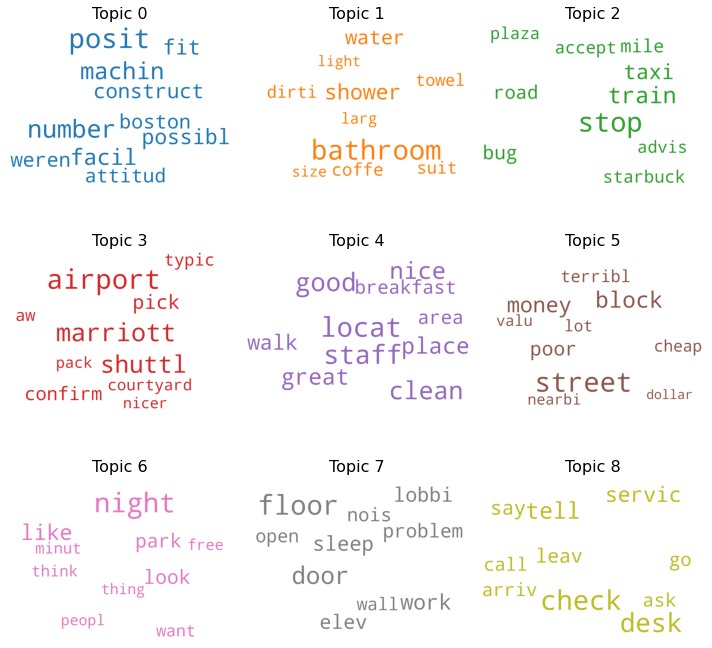

In [43]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


#stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

#### Most Dominant Topic in each Document

The most typical approach to determine whether a document belongs to a particular topic is to findout which topic has the highest contribution to that document. All the major topics in a document are hightlighted in blue. Each document is assigned the most dominant topic in its own column.

In [31]:
topic_weight = []
num_topics = lda_model.num_topics

for i in range(0,20):
    array = np.zeros((num_topics), dtype=float)
    for row_list in lda_model[bow_corpus][i][0]:
        array[row_list[0]] = np.round(row_list[1],2)
    topic_weight.append(array)   

# Column names
topicnames = ["Topic_" + str(i) for i in range(lda_model.num_topics)]

# Index names
docnames = ["Doc_" + str(i) for i in range(0,20)]

df_dominant_topic = pd.DataFrame(np.round(topic_weight, 2), columns=topicnames, index=docnames)

df_dominant_topic.head()

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
Doc_0,0.02,0.05,0.02,0.01,0.33,0.02,0.19,0.20,0.13,0.04
Doc_1,0.01,0.07,0.02,0.01,0.22,0.04,0.42,0.09,0.09,0.03
Doc_2,0.00,0.06,0.01,0.00,0.37,0.01,0.33,0.06,0.09,0.04
Doc_3,0.01,0.08,0.02,0.01,0.21,0.02,0.34,0.08,0.21,0.03
Doc_4,0.02,0.07,0.02,0.02,0.23,0.03,0.29,0.11,0.14,0.08


In [32]:
# Get dominant topic for each document
dominant_topic = np.argmax(df_dominant_topic.values, axis=1)
df_dominant_topic['dominant_topic'] = dominant_topic

def color_style(val):
    color = 'steelblue' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_dominant_topics = df_dominant_topic.head().style.applymap(color_style).applymap(make_bold)


In [33]:
df_dominant_topics

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,dominant_topic
Doc_0,0.020000,0.050000,0.020000,0.010000,0.330000,0.020000,0.190000,0.200000,0.130000,0.040000,4
Doc_1,0.010000,0.070000,0.020000,0.010000,0.220000,0.040000,0.420000,0.090000,0.090000,0.030000,6
Doc_2,0.000000,0.060000,0.010000,0.000000,0.370000,0.010000,0.330000,0.060000,0.090000,0.040000,4
Doc_3,0.010000,0.080000,0.020000,0.010000,0.210000,0.020000,0.340000,0.080000,0.210000,0.030000,6
Doc_4,0.020000,0.070000,0.020000,0.020000,0.230000,0.030000,0.290000,0.110000,0.140000,0.080000,6


As shown in the table above, each document consists of multiple topics. The code below extracts this dominant topic for each document together with the weight and the corresponding keywords.

In [34]:
def Dominants_Topics(ldamodel=None, corpus=bow_corpus, texts=hotel_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[bow_corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = Dominants_Topics(ldamodel=lda_model, corpus=bow_corpus, texts=processed_doc)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_weight', 'Keywords', 'Text']

In [35]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_weight,Keywords,Text
0,0,4.0,0.3296,"locat, staff, good, clean, nice, place, great,...","[stay, husband, son, alaska, cruis, love, hote..."
1,1,6.0,0.4221,"night, like, look, park, want, think, minut, f...","[room, nice, clear, updat, recent, clean, comf..."
2,2,4.0,0.3723,"locat, staff, good, clean, nice, place, great,...","[wife, stay, glorious, citi, expens, littl, ho..."
3,3,6.0,0.3403,"night, like, look, park, want, think, minut, f...","[boyfriend, stay, fairmont, recent, trip, fran..."
4,4,6.0,0.2858,"night, like, look, park, want, think, minut, f...","[step, time, squar, nice, room, stay, night, g..."
5,5,4.0,0.3224,"locat, staff, good, clean, nice, place, great,...","[wife, kid, stay, valentin, weekend, nice, hot..."
6,6,4.0,0.4151,"locat, staff, good, clean, nice, place, great,...","[high, recommend, hawthorn, terrac, afford, co..."
7,7,6.0,0.2663,"night, like, look, park, want, think, minut, f...","[hotel, clean, nice, locat, good, free, shuttl..."
8,8,8.0,0.2781,"check, desk, tell, servic, say, leav, go, ask,...","[stay, elan, octob, like, return, trip, vega, ..."
9,9,2.0,0.2358,"stop, train, taxi, bug, road, mile, starbuck, ...","[stay, night, happi, locat, min, walk, walk, f..."


### Model Visualization

pyLDAVis is a commonly used package to visualise the information contained in a topic model.

In [36]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.266922  0.075722       1        1  27.553743
4     -0.207692 -0.013345       2        1  21.192608
8     -0.230740  0.145354       3        1  15.449439
7     -0.027262 -0.033322       4        1  11.292412
1      0.015559 -0.321298       5        1   9.082067
9      0.048537 -0.256341       6        1   5.241202
5      0.169820  0.106827       7        1   3.268106
2      0.169356  0.118093       8        1   2.850497
0      0.165528  0.094256       9        1   2.166874
3      0.163815  0.084052      10        1   1.903048, topic_info=         Term          Freq         Total Category  logprob  loglift
146      time  19096.000000  19096.000000  Default  30.0000  30.0000
43      locat  23195.000000  23195.000000  Default  29.0000  29.0000
104     staff  21717.000000  21717.000000  Default  28.0000  28.0000
40       good  20597.000000  20597.000000  Default  27.0000  27.0000
136     night  24059.000000  24059.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
2443    newer    371.982300    372.783966  Topic10  -4.7018   3.9596
1451  respond    369.045135    369.846954  Topic10  -4.7097   3.9595
1891  beverag    360.989410    361.791290  Topic10  -4.7318   3.9595
2076     dead    340.821289    341.622986  Topic10  -4.7893   3.9594
2393  shouldn    339.637756    340.439514  Topic10  -4.7928   3.9594

[393 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1830      8  0.999579  accept
159       2  0.012189  access
159       4  0.987730  access
583       1  0.999576  actual
1622      5  0.032475   adequ
...     ...       ...     ...
623       4  0.999915  window
61        1  0.209306    work
61        3  0.034704    work
61        4  0.755888    work
355       6  0.999754    york

[431 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 9, 8, 2, 10, 6, 3, 1, 4])

#### Word Counts of Topic Keywords

Let’s plot the word counts and the weights of each keyword in the same chart to visualize how frequently the words have appeared in each topic.

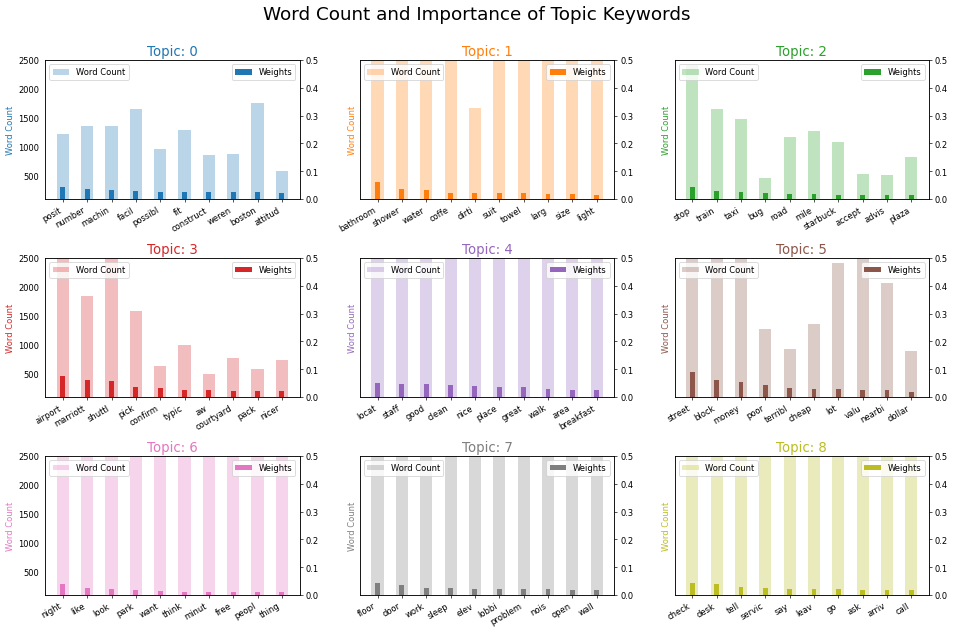

In [73]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in processed_doc for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 3, figsize=(16,10), sharey=True, dpi=60)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0., 0.5); ax.set_ylim(100, 2500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

#### Sentence Chart Colored by Topic

Each word in the document is representative of one of all the topics. In the documents each is colored that indicates the topic it is attributed to.

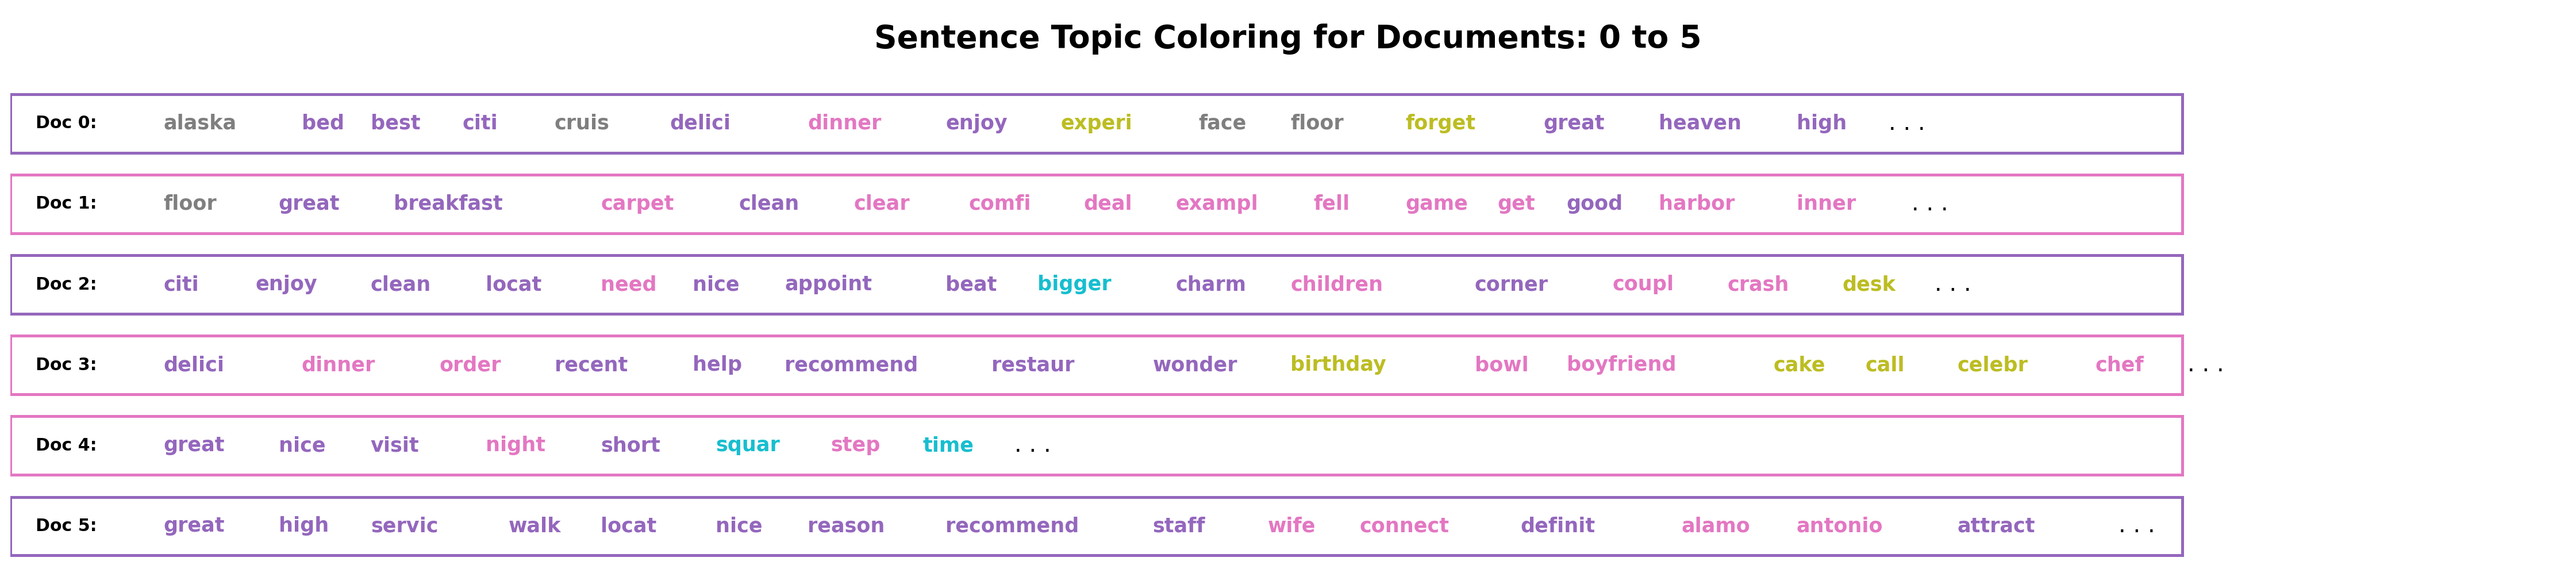

In [78]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=bow_corpus, start = 0, end = 7):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(25, (end-start)*0.80), dpi=180)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i >0:
            corp_cur = corp[i-1]
            #print(corp_cur)
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
        
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=12, color='black', transform=ax.transAxes, fontweight=700)
           
            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.85, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 15:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=14, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    



#### Most Discussed Topics in the Documents

In [39]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=bow_corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

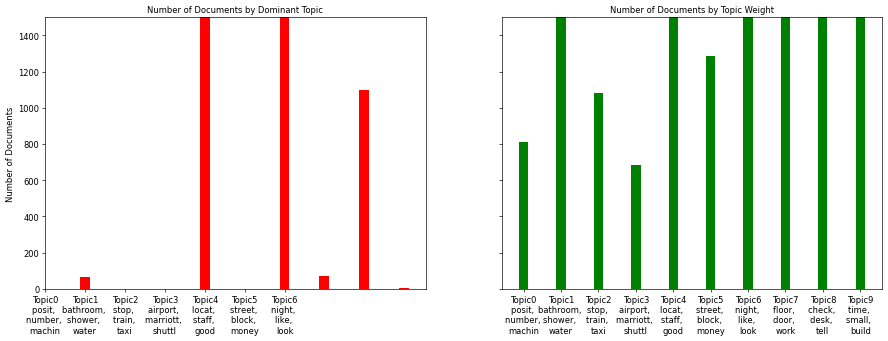

In [79]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), dpi=60, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.25, color='red')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1500)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.25, color='green')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weight', fontdict=dict(size=10))

plt.show()
